In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA READING

In [2]:
df=pd.read_csv("forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## DATA TRANSFORMATION

In [3]:
df["month"]=df["month"].replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})
df["day"]=df["day"].replace({'fri':5, 'tue':2, 'sat':6, 'sun':7, 'mon':1, 'wed':3, 'thu':4})

C:\Users\user\AppData\Local\Temp\ipykernel_8260\3045225968.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["month"]=df["month"].replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})
C:\Users\user\AppData\Local\Temp\ipykernel_8260\3045225968.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["day"]=df["day"].replace({'fri':5, 'tue':2, 'sat':6, 'sun':7, 'mon':1, 'wed':3, 'thu':4})


In [4]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [12]:
df.isnull().sum()
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
X=df.drop("area",axis=1)
scaler=StandardScaler()
df[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']]=scaler.fit_transform(X)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.00
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.00
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.00
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.00
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,6.44
513,-1.154748,-0.244001,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,54.29
514,1.008313,-0.244001,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,11.16
515,-1.587360,-0.244001,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,0.00


## CHECKING THE CORRELATION BETWEEN FEATURES

In [18]:
correlation_matrix=df.corr(method="spearman")
correlation_matrix

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.492705,-0.069044,-0.022998,-0.059573,-0.079860,-0.072543,-0.010799,-0.051083,0.065841,0.026846,0.109536,0.060499
Y,0.492705,1.000000,-0.082142,-0.010061,-0.009635,0.004525,-0.105404,-0.013202,-0.040541,0.050028,-0.008629,0.079107,0.046018
month,-0.069044,-0.082142,1.000000,-0.063221,0.176771,0.250538,0.769425,0.046424,0.176009,-0.088580,-0.120756,-0.057870,0.117681
day,-0.022998,-0.010061,-0.063221,1.000000,0.015768,0.026804,0.009544,0.068310,0.049776,0.093027,0.038983,-0.044333,-0.016799
FFMC,-0.059573,-0.009635,0.176771,0.015768,1.000000,0.511437,0.263049,0.783566,0.594765,-0.319549,-0.035399,0.097398,0.025300
DMC,-0.079860,0.004525,0.250538,0.026804,0.511437,1.000000,0.558791,0.425159,0.502963,0.034604,-0.110436,0.120555,0.071920
DC,-0.072543,-0.105404,0.769425,0.009544,0.263049,0.558791,1.000000,0.103832,0.308746,0.025869,-0.205825,0.008048,0.061633
ISI,-0.010799,-0.013202,0.046424,0.068310,0.783566,0.425159,0.103832,1.000000,0.416404,-0.177498,0.135586,0.117454,0.012496
temp,-0.051083,-0.040541,0.176009,0.049776,0.594765,0.502963,0.308746,0.416404,1.000000,-0.517636,-0.179908,0.026024,0.078696
RH,0.065841,0.050028,-0.088580,0.093027,-0.319549,0.034604,0.025869,-0.177498,-0.517636,1.000000,0.037157,0.181059,-0.024221


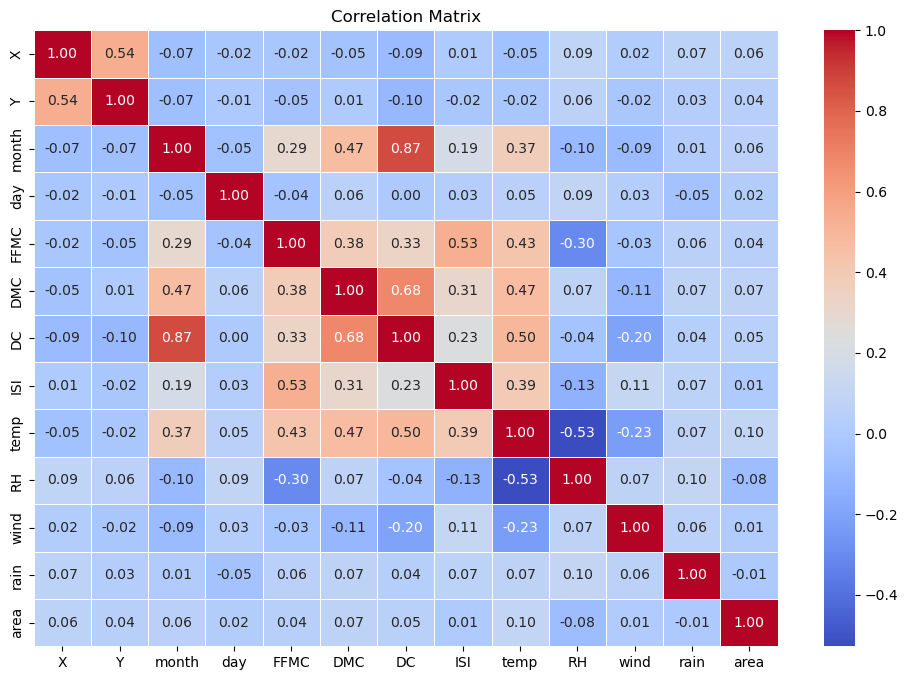

In [8]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",linewidths=0.5,cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [9]:
sns.histplot(df.log_area)

AttributeError: 'DataFrame' object has no attribute 'log_area'

In [ ]:
df['log_area'] = np.log1p(df['area'])

In [ ]:
df

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X=df.drop("area",axis=1)
y=df.area
poly=PolynomialFeatures(degree=3)

X_poly=poly.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=12)


In [30]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

-27085854.151549824